In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

data=pd.read_csv('HR_comma_sep.csv')
data.shape
data.head()

le = preprocessing.LabelEncoder()
data['Encoded Salary']=le.fit_transform(data['salary'])
data['Dept']=le.fit_transform(data['sales']) 
print(data[['Encoded Salary','Dept']])
data.sales.unique()
pd.unique(data[['sales', 'Dept']].values.ravel('K'))

       Encoded Salary  Dept
0                   1     7
1                   2     7
2                   2     7
3                   1     7
4                   1     7
...               ...   ...
14994               1     8
14995               1     8
14996               1     8
14997               1     8
14998               1     8

[14999 rows x 2 columns]


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', 7, 2, 3, 9, 8, 4, 0, 6,
       5, 1], dtype=object)

In [3]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Dept', 'Encoded Salary']]
y=data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.01)

clf.fit(X_train,y_train)
#clf.loss_curve_

testX = [[0.37,0.32,2,188,3,0,0,7,0]]  
testpred=clf.predict(testX)
print("testpred is :", testpred)
if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")

testpred is : [1]
Employee will leave


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
# Make prediction on train dataset
ypredtrain = clf.predict(X_train)

# Calcuate accuracy
print("Accuracy Score for Train Data is",accuracy_score(y_train,ypredtrain))

# Make prediction on test dataset
ypredtest=clf.predict(X_test)

# Calcuate accuracy
print("Accuracy Score for Test Data is", accuracy_score(y_test,ypredtest))


Accuracy Score for Train Data is 0.9455787982331861
Accuracy Score for Test Data is 0.938


In [6]:
from sklearn.metrics import confusion_matrix
conftrain=confusion_matrix(y_train,ypredtrain)
print("Train Confusion Matrix is\n", conftrain)


conftest=confusion_matrix(y_test,ypredtest)
print("Test Confusion Matrix is\n", conftest)

Train Confusion Matrix is
 [[8699  435]
 [ 218 2647]]
Test Confusion Matrix is
 [[2175  119]
 [  67  639]]


In [13]:
TN, FN, FP, TP = metrics.confusion_matrix(list(y_test), list(ypredtest), labels=[0, 1]).ravel() #0,1 is default label of sklearn


print("\n For Test Data")
print("\nTH",TN)
print("\nTP",TP)
print("\nFH",FN)
print("\nFP",FP)

TN, FN, FP, TP = metrics.confusion_matrix(list(y_train), list(ypredtrain), labels=[0, 1]).ravel() #0,1 is default label of sklearn

print("\n For Train Data")
print("\nTH",TN)
print("\nTP",TP)
print("\nFH",FN)
print("\nFP",FP)

print("\n Test Precision is", metrics.precision_score(y_test, ypredtest))
print("\n Train Precision is", metrics.precision_score(y_train, ypredtrain))
print("\n Test Recall is", metrics.recall_score(y_test, ypredtest))
print("\n Train Recall is", metrics.recall_score(y_train, ypredtrain))


 For Test Data

TH 2175

TP 639

FH 119

FP 67

 For Train Data

TH 8699

TP 2647

FH 435

FP 218

 Test Precision is 0.8430079155672823

 Train Precision is 0.8588578844905905

 Test Recall is 0.9050991501416431

 Train Recall is 0.9239092495636998


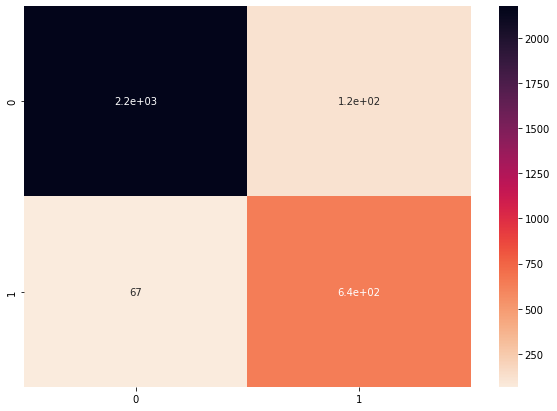

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,ypredtest)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='rocket_r')

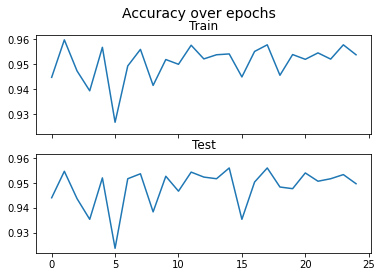

In [15]:

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    #print('epoch: ', epoch)
    # SHUFFLING
    # Do randon permutation umtil the # of rows in dataset. Here it is 14,999
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0

    #Do mini-batch training until # of rows are reached 
    while True:
        # MINI-BATCH
        # Do for a random # of rows + fixed batch sixe 
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        # Fit the MLP Classifier 
        clf.partial_fit(X_train.iloc[indices], y_train.iloc[indices], classes=N_CLASSES)
        # Do for the rest after the previous mini-batch index 
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # ACCURACY SCORE FOR TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # ACCURACY SCORE FOR TEST
    scores_test.append(clf.score(X_test, y_test))

    epoch += 1

""" Plotting the Accuracy Score Over the 25 Epochs"""
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()